# Potential and Field

In the previous notebook, you explored the effects and properties of the vector operations ***divergence***, ***gradient***, and ***curl***.  In this notebook, you will use these operations to explore relations between the electric field, the electrostatic potential, and the charge density.


## Zero Curl

Consider the following electric field:
$$
\vec{E} = (2xy^2 + z^3) \, \hat{\mathbf{e}}_x
        + (2x^2y) \, \hat{\mathbf{e}}_y
        + (3xz^2) \, \hat{\mathbf{e}}_z
$$

Show that $\nabla \times \vec{E} = 0$.

Adapt the methods of the previous notebook to do the following:

1. Define the vector field $\vec{E}$ on a 3D grid.
2. Plot $\vec{E}$.
3. Compute the curl, $\nabla \times \vec{E}$, on the same grid.
4. Demonstrate that $\nabla \times \vec{E} \approx 0$.

For Part 4, do not simply compute the curl.  You may not obtain strict equality in part 4 due to numerical error and edge effects, but you should provide some quantitative evidence that the curl is nearly zero nearly everywhere.

In [12]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Get access to custom functions.
import VectorCalculus as vc
import Electrodynamics as ed

from importlib import reload
reload(vc)
reload(ed)

<module 'Electrodynamics' from 'C:\\Users\\jaime\\OneDrive\\Documents\\Electricty and Magnetism HW\\electrodynamics\\week-02\\Electrodynamics.py'>

In [13]:
## Use this command to turn ON interactive plots:
%matplotlib notebook

## Use this command to turn OFF interactive plots.
# %matplotlib inline

In [14]:
# Define coordinate grid.
num_points = 257
box_size = 5

# Store coordinate arrays.
X,Y,Z = ed.coordinates(L=box_size, N=num_points)

# Compute grid spacing.
ds = X[1,0,0] - X[0,0,0]

# Store grid and spacing in a single object for repeated use later.
grid = (X,Y,Z,ds)

# Compute the electric field.
EX = X*2*Y**2+X**3
EY = 2*X**2*Y
EZ = 3*X*Z**2
E  = np.stack([EX, EY, EZ])

Part 1: Defining vector E in 3D (not sure how to plot it past this for part 2)

<IPython.core.display.Javascript object>


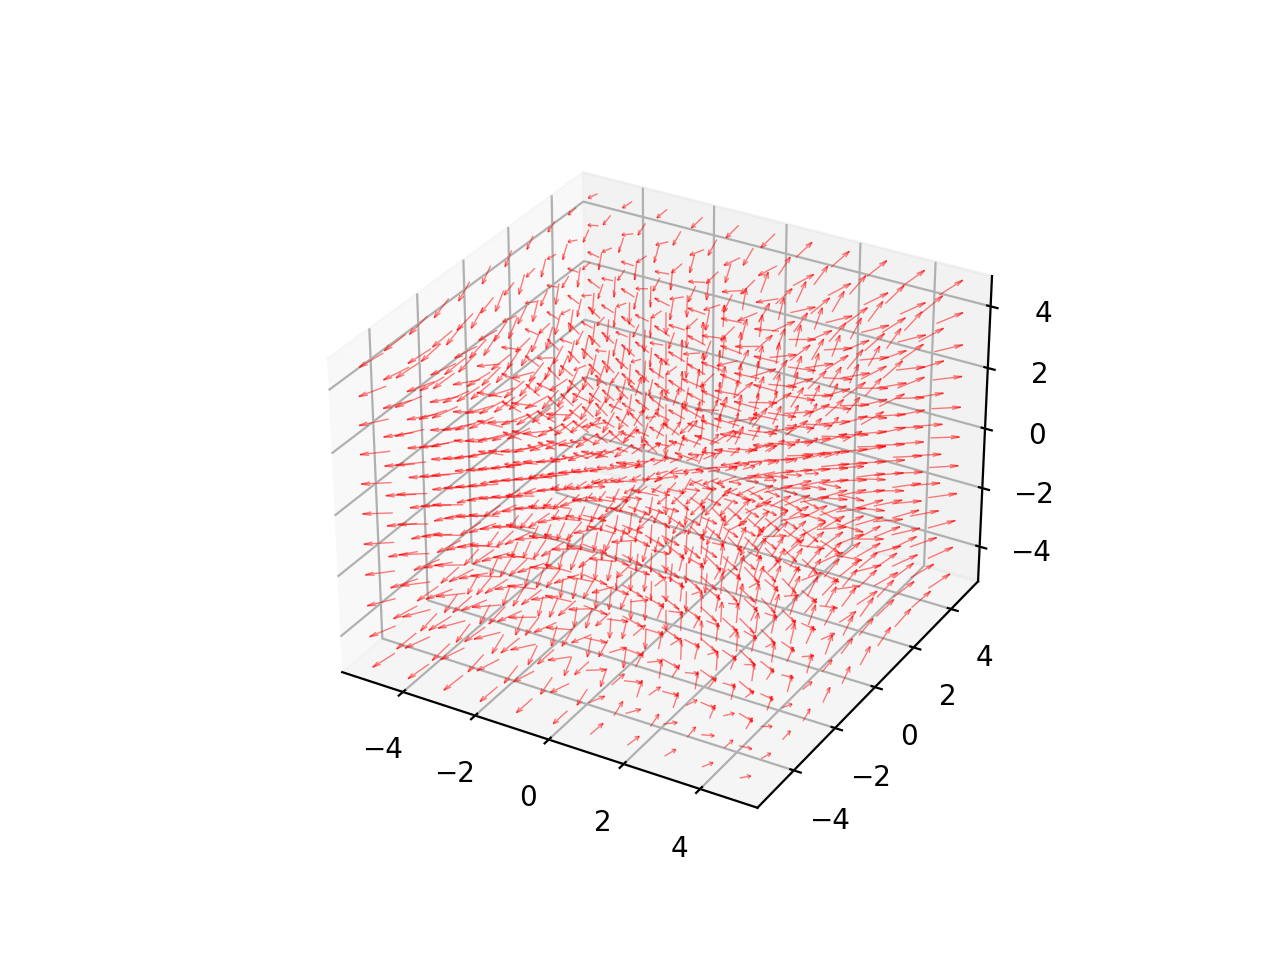

<Axes3DSubplot:>

In [15]:
# Draw the electric field.
ed.draw_vector_field(X,Y,Z,*E)

Part 3: compute the curl

In [16]:
# Define a vector field.


# Compute the curl.
dE = vc.curl(E,ds)

<IPython.core.display.Javascript object>


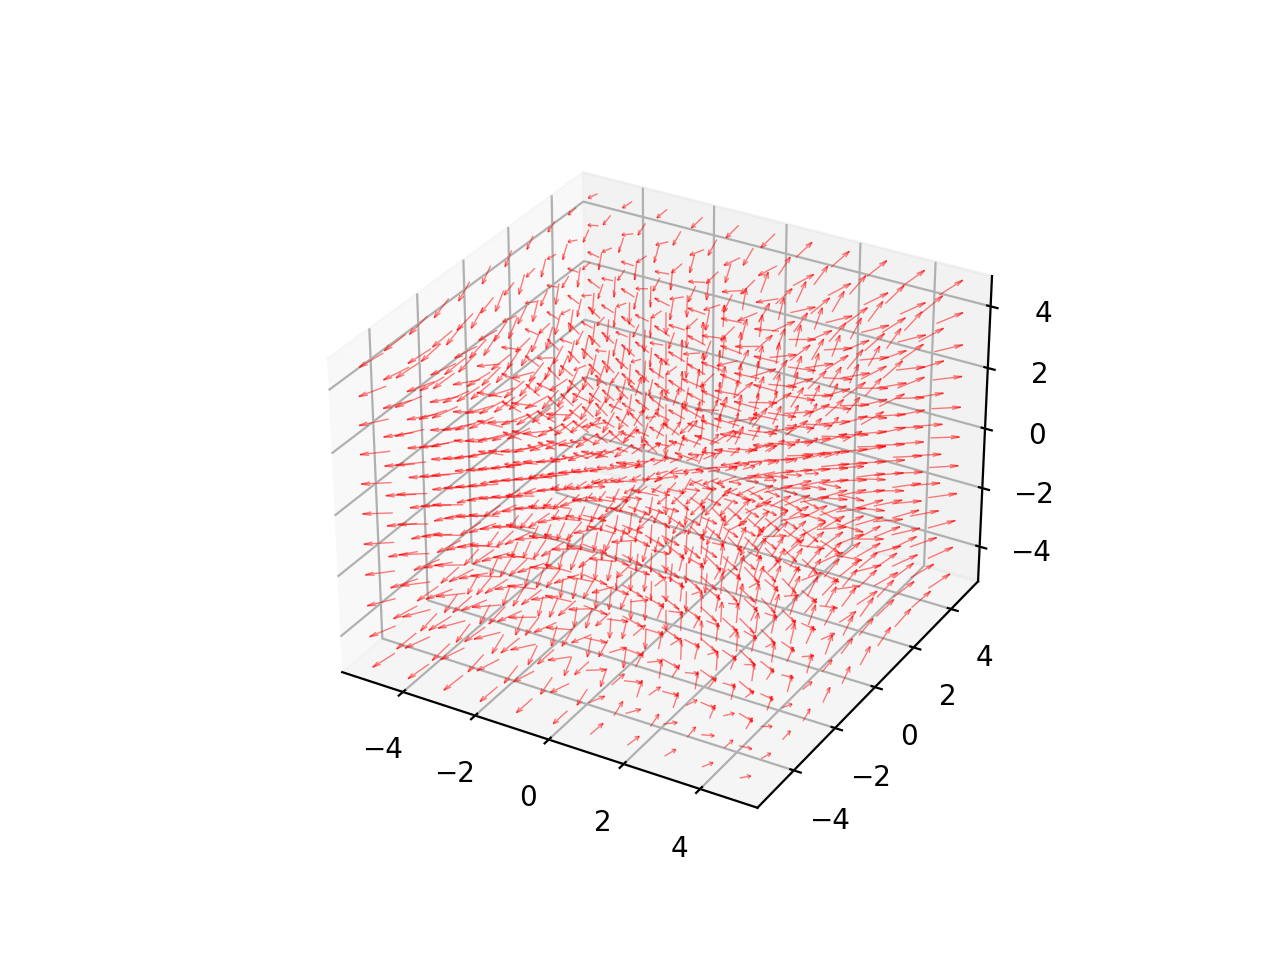

<IPython.core.display.Javascript object>


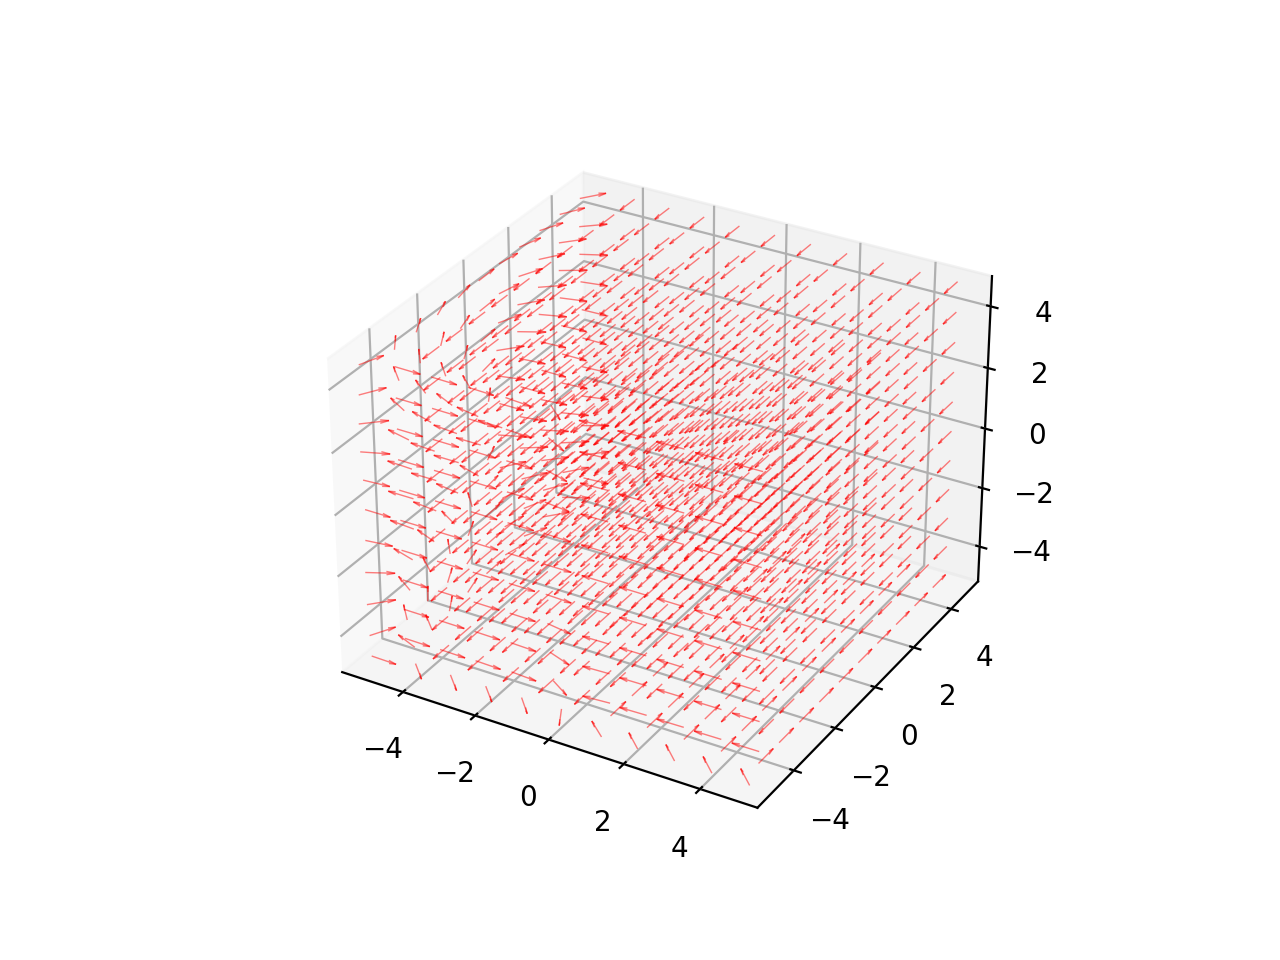

In [17]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*E)

# Plot the curl.
ed.draw_vector_field(X,Y,Z,*dE)

stride = 1

Observations: Having the interactive plots made it much easier to visualize the field and curl. The E isn't totally uniform, but it does seem to be moslty going toward and away from the center of tht plot. That said, along a line, it does not change much. That's why the curl plot has vectors aligned in a straight line for every point. Because curl E is the integral along each Curve/line, the plot agrees that curl E is close to 0 (it is unchanging).

## Gradient

Find the potential.

Since the curl of $\vec{E}$ is zero, we can write $\vec{E}$ as the gradient of a function $\phi$:
$$\nabla \times \vec{E} = 0 \qquad \implies \qquad \vec{E} = -\nabla \phi$$

Determine a function $\phi(x,y,z)$ whose gradient is $\vec{E}$.

1. Derive the scalar field $\phi$.  Use any method you like: pencil and paper, trial and error, symbolic computing, etc.
2. Define the scalar field $\phi$ on a 3D grid.
3. Plot a slice of $\phi$ for some constant $z$-values of your choice.
4. Compute the gradient, $\nabla \phi$, on the same grid.
5. Compare $-\nabla\phi$ and the original field $\vec{E}$.  Demonstrate that $\vec{E} \approx - \nabla \phi$.

For Part 5, do not simply compute the gradient.  You may not obtain strict equality due to numerical error and edge effects, but you should provide some quantitative evidence that the gradient of the function you chose is nearly equal to $\vec{E}$ nearly everywhere.

I'm finding grad of $\phi(x,y,z)$ where phi is potential, meaning the negative gradient of the potential is equal to Electric field, and gradient is where the function changes the fastest; it has a direction and a magnitude. I need to see where phi changes the fastest. Gradient shuold only have one direction.
Plotting the gradient of potential should look the same as the plot of E

In [47]:
# Define a function for potential in 3D.
f = np.exp(-EX**2 - EY**2 - EZ)

# Compute its gradient.
df = vc.grad(f,ds)

I picked my function from trial and error, starting with the function from notebook 3, just to make sure the code would work. This didn't give me the function of $\phi(x,y,z)$ that I need, but the slice of it does look super cool.

From there, I tried different functions to find a vector field that looked like that of E and a slice of the potential that showed a gradient toward the center, like we've seen in other notebooks. I ran into a problem when my vector plot was scaled to the hundreds, so I can't really see the vector fields that it's producing. I tried fixing this by introducing a figure size: fig = plt.figure(figsize=(4,4)) but this just created a smaller figure that sat empty.

First I tried (-EX - EY - EZ)
Then (-EX^2 - EY - EZ). This gave a bunch of rows of vectors, all vertical, that were all negative below zero and positive above (so two axes shared a sign, the third component didn't seem to care).

I tried some more, but I wasn't able to find a function that showed a reasonable slice or gradient of potential, proving that E is equal to grad potential.

<IPython.core.display.Javascript object>


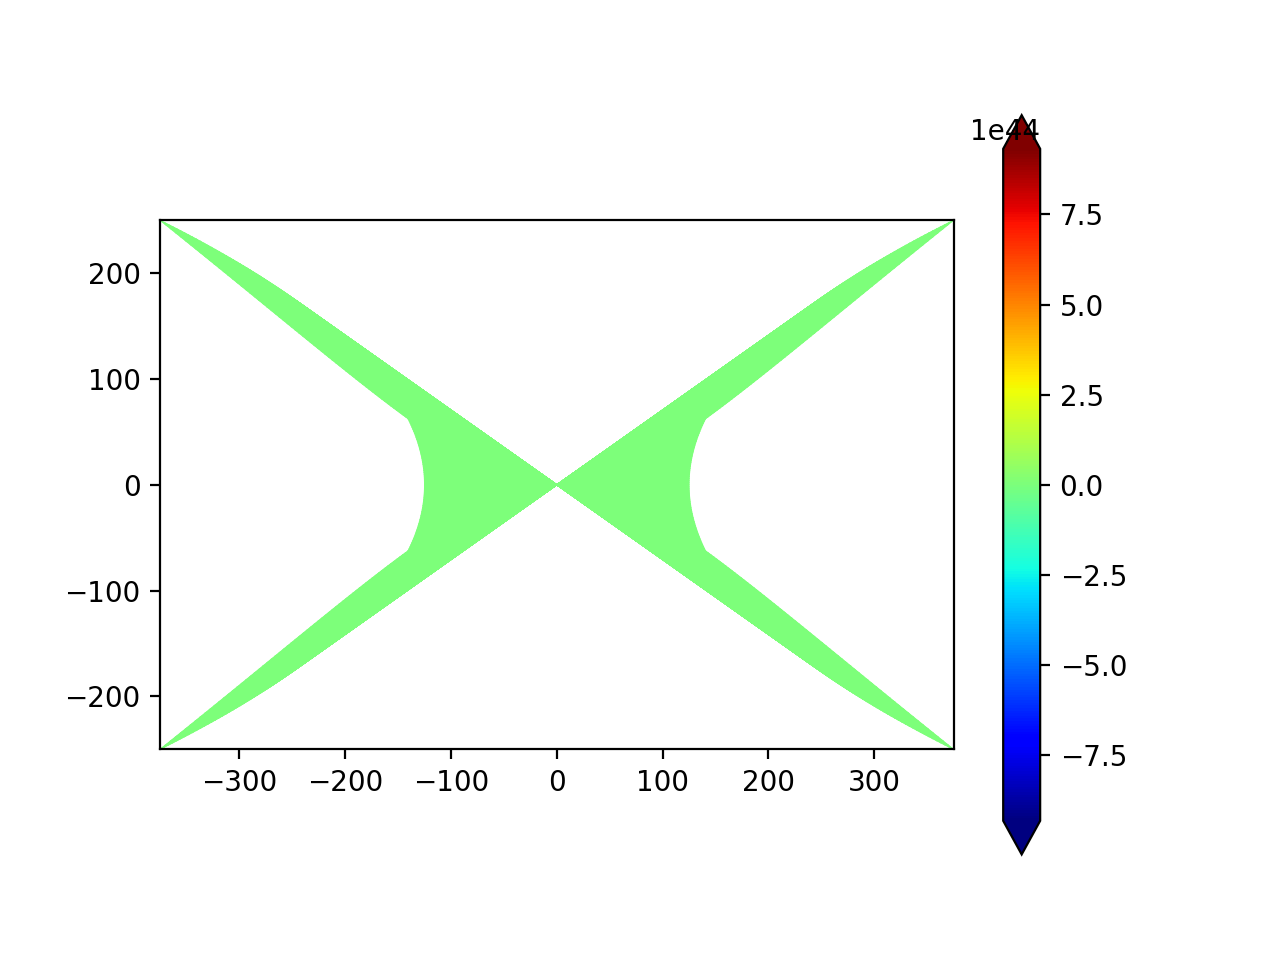

<IPython.core.display.Javascript object>


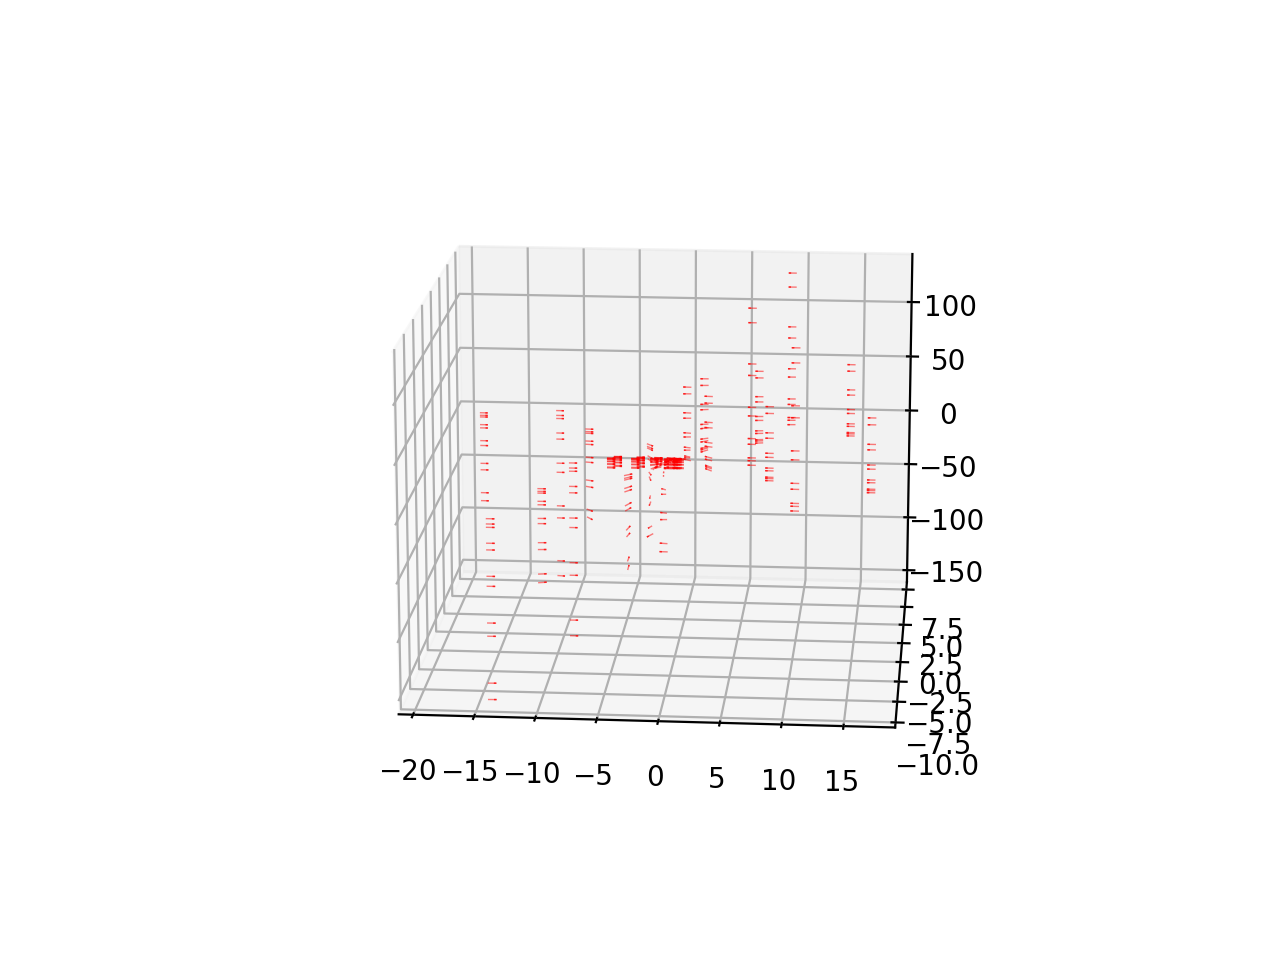

<Axes3DSubplot:>

In [48]:
# Draw a slice of the function.
ed.draw_scalar_field(EX,EY,EZ,f, cutoff=f.max())

# Draw the resulting vector field of the gradient
ed.draw_vector_field(EX,EY,EZ,*df)

## Summary and Reflection

Summarize your efforts, insights, and conclusions in the space below.
- What did you find?
I better understand the syntax of Python (how to raise to an exponent, how to change typeface, case sensitivity, and more), but I still have a long way to go. I also learned (more from lecture than applied it here) how and why the curl of E has to be zero, and why the -gradient of potential should be equal to E. Also, I'm learning a lot about making equations in markdown 
- What was difficult?
Both finding functions and applying them to code were equally difficult for me. I find it challenging to work through obstacles in the code when I'm not confident in my function, and vise versa. Not being great with either makes it really hard for me to problem-solve, because I'm not sure which area the problem is coming from.
- How confident are you in your work?
Not very. I'm more confident in my graphing of curl than of my analysis, and more confident in my analysis of grad than my graphing, but I don't think any of it is completely well-done.
- What questions do you have after working through this exercise?
If potential of E is $$\int d\vec{s} \cdot \vec{E}$$ but $$\int d\vec{s} \cdot \vec{E}$$ is also curl and equal to zero (from class on the 13th) then how can we set $$E = -\nabla \phi$$ without just getting E=0 ?